In [3]:
import pandas as pd
import numpy as np
import os

import datetime
import time
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import re
import pytz
from IPython.display import clear_output
import subprocess
import smtplib
import sys

import warnings
warnings.filterwarnings("ignore")# Desactivar todas las advertencias (warnings)
from geopy.distance import great_circle
import folium




In [4]:
df_mineral = pd.read_csv('Mineral Ores Around The World Cleaned.csv',decimal='.')
df_mineral

site_name  latitude  longitude region  \
0                       Red Dog mine  68.07000 -162.83000    NaN   
1                             Su-Lik  68.16600 -163.20500    NaN   
2     Many Values Pegmatite Prospect  41.04952 -106.17495    NaN   
3              Democrat Hill deposit  38.10472 -105.36139    NaN   
4                   Adobe Walls Mine  29.47333 -103.55222    NaN   
...                              ...       ...        ...    ...   
3120                McIlroy property  36.53643 -117.91703    NaN   
3121               Nichols Ranch ISL  43.70000 -106.01667    NaN   
3122     Tarrant Property in Sec. 39  29.32500 -103.69200    NaN   
3123              Pike City Prospect  34.12600  -93.60200    NaN   
3124                    Okolona Road  34.16000  -93.38200    NaN   

            country       state    county com_type  \
0     United States      Alaska       NaN        B   
1     United States      Alaska       NaN        B   
2     United States     Wyoming    Albany        B   
3     United States    Colorado    Custer        B   
4     United States       Texas  Brewster        M   
...             ...         ...       ...      ...   
3120  United States  California      Inyo      NaN   
3121  United States     Wyoming  Campbell      NaN   
3122  United States       Texas  Brewster        M   
3123  United States    Arkansas      Pike        M   
3124  United States    Arkansas     Clark        M   

                                commod1                           commod2  \
0                    Zinc, Silver, Lead                     Barium-Barite   
1                    Zinc, Silver, Lead            Cadmium, Barium-Barite   
2             Mica, Beryllium, Tantalum  Garnet, REE, Niobium (Columbium)   
3     Potassium, Silver, Aluminum, Gold                        Lead, Zinc   
4                               Mercury                               NaN   
...                                 ...                               ...   
3120           Asbestos, Talc-Soapstone                               NaN   
3121                            Uranium                               NaN   
3122                            Mercury                               NaN   
3123                            Mercury                               NaN   
3124                            Mercury                               NaN   

                          commod3            oper_type prod_size  \
0     Gold, Copper, Barium-Barite  Surface-Underground       NaN   
1          Cadmium, Barium-Barite  Surface-Underground       NaN   
2                         Uranium              Surface         S   
3                             NaN          Underground         N   
4                         Uranium          Underground         S   
...                           ...                  ...       ...   
3120                          NaN          Underground       NaN   
3121                          NaN                 Well       NaN   
3122                          NaN          Underground       NaN   
3123                          NaN              Surface       NaN   
3124                          NaN              Surface       NaN   

           dev_stat                                                ore  \
0          Producer  Barite, Boulangerite, Galena, Marcasite, Polyb...   
1          Prospect  Boulangerite, Bournonite, Galena, Marcasite, P...   
2     Past Producer                        Beryl, Tantalite, Muscovite   
3     Past Producer  Alunite, Diaspore, Kaolinite, Pyrite, Galena, ...   
4     Past Producer                                Carnotite, Cinnabar   
...             ...                                                ...   
3120  Past Producer                                          Tremolite   
3121       Prospect                                                NaN   
3122  Past Producer                                           Cinnabar   
3123     Occurrence                                           Cinnabar   
3124 

In [5]:
df_mineral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site_name   3125 non-null   object 
 1   latitude    3125 non-null   float64
 2   longitude   3125 non-null   float64
 3   region      1065 non-null   object 
 4   country     3125 non-null   object 
 5   state       2630 non-null   object 
 6   county      1779 non-null   object 
 7   com_type    3112 non-null   object 
 8   commod1     3125 non-null   object 
 9   commod2     967 non-null    object 
 10  commod3     1228 non-null   object 
 11  oper_type   3125 non-null   object 
 12  prod_size   1023 non-null   object 
 13  dev_stat    3125 non-null   object 
 14  ore         1006 non-null   object 
 15  gangue      867 non-null    object 
 16  work_type   3125 non-null   object 
 17  hrock_type  1132 non-null   object 
 18  arock_type  552 non-null    object 
dtypes: float64(2), object(17)
m

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>📎 Pregunta 1: </font></h3>
    
* Crear mapa con la ubicación de cada uno de los centros de explotación, que tenga un 
mapa base (puede sr cualquiera: Google, OpenStreet Maps o cualquier otro) y que
utilice una clasificación de colores para cada mina que permita diferenciar los tipos de 
operación que existen (variable oper_type). ¿Qué conclusiones puede sacar del mapa 
creado?

In [6]:

mapa = folium.Map(location=[-33.4489, -70.6693], zoom_start=4) # Punto central arbitrario para el inicio.

# Asignamos colores a cada tipo de operación.
colores_oper_type = {
    "Surface": "blue",
    "Underground": "red",
    "Surface-Underground": "green",
    "Well": "purple",
    "Unknown": "orange",
}

# marcadores
for idx, fila in df_mineral.iterrows():
    color = colores_oper_type.get(fila['oper_type'], "black")
    folium.Marker(
        location=[fila['latitude'], fila['longitude']],
        popup=f"{fila['site_name']} - {fila['oper_type']}",
        icon=folium.Icon(color=color)
    ).add_to(mapa)


mapa.save('mapa_minas.html')  # Guarda el mapa en un archivo HTML
mapa

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">
<h3 align="left"><font color='#6B8BA0'>Análisis de Métodos de Minería y su Relación con la Topografía </font></h3>
<p>La <strong>minería a cielo abierto</strong>, marcada en azul en el mapa, tiende a ser más común en <strong>áreas planas o de baja altitud</strong>. Se puede especular que este método es efectivo para extraer minerales cercanos a la superficie y es factible en terrenos llanos donde se pueden crear grandes fosas. En estas regiones, el acceso a maquinaria pesada y la infraestructura necesaria es más sencillo y menos costoso.</p>
<p>En contraste, la <strong>minería subterránea</strong>, representada en rojo, es prevalente en <strong>áreas montañosas</strong> o donde los depósitos minerales están a mayor profundidad. Se puede especular que por la topografía accidentada de estas áreas hace que la minería a cielo abierto sea menos viable, mientras que la minería subterránea permite el acceso a minerales profundos sin alterar significativamente la superficie.</p>
<p>Otros factores que pueden influenciar, son <strong> las condiciones climáticas locales</strong> que son cruciales en la elección del método de minería. En regiones de alta altitud, las condiciones extremas y la menor disponibilidad de oxígeno pueden hacer que la minería a cielo abierto sea impracticable, planteando desafíos adicionales como la seguridad de los trabajadores.</p>

</div>

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>🖇️ Pregunta 2: </font></h3>
    
*  Utilizando la columna commod1, identifique la frecuencia relativa de los minerales 
extraídos en los centros de explotación (considerar minerales de forma individual, 
separando cuando se extrae más de 1 mineral de 1 mina)


In [7]:
minerals_list = df_mineral['commod1'].str.split(', ').explode().value_counts(normalize=True)# Dividir los minerales que están en una misma celda y contar su frecuencia
minerals_relative_frequency = minerals_list * 100 # multiplicando por 100 para obtener porcentajes
minerals_relative_frequency


commod1
Copper                13.263312
Gold                  12.970200
Silver                 8.817782
Lead                   7.620909
Zinc                   7.596483
                        ...    
Cerium                 0.024426
Corundum               0.024426
Pumice                 0.024426
Dimension              0.024426
Volcanic Materials     0.024426
Name: proportion, Length: 80, dtype: float64

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>🖇️ Pregunta 3: </font></h3>
    
* ¿Hay alguna relación entre el tipo de operación oper_type y el tipo de mineral extraído 
commod1?

In [8]:
import pandas as pd


unique_minerals = list({mineral for sublist in df_mineral['commod1'].str.split(', ') for mineral in sublist}) # lista de todos los minerales únicos

# Crea columnas para cada mineral y agrupar por 'oper_type'
df_mineras = (df_mineral.assign(**{mineral: df_mineral['commod1'].str.contains(mineral).astype(int) 
                                   for mineral in unique_minerals})
                     .groupby('oper_type')[unique_minerals].sum().T)
df_mineras.reset_index(inplace=True)
df_mineras.rename(columns={'index':'minerales'},inplace=True)
df_mineras 

oper_type            minerales  Brine Operation  Leach  Offshore  Placer  \
0                        Stone                0      0         0       0   
1                     Selenium                0      0         0       0   
2                    Manganese                0      0         0       0   
3          Niobium (Columbium)                0      0         0       0   
4                    Tellurium                0      0         0       0   
..                         ...              ...    ...       ...     ...   
75                    Asbestos                0      0         0       0   
76          Volcanic Materials                0      0         0       0   
77                     Lithium                0      0         0       0   
78                      Indium                0      0         0       0   
79                   Palladium                0      0         0       0   

oper_type  Processing Plant  Surface  Surface-Underground  Underground  Well  
0                         1       14                    0            1     0  
1                         0        0                    0            1     0  
2                         0       16                    1           13     1  
3                         0        0                    0            0     0  
4                         0        0                    0            1     0  
..                      ...      ...                  ...          ...   ...  
75                        0        5                    3            5     0  
76                        0        1                    0            0     0  
77                        0        8                    0            4     0  
78                        0        0                    0            1     0  
79                        0        2                    1            7     0  

[80 rows x 10 columns]

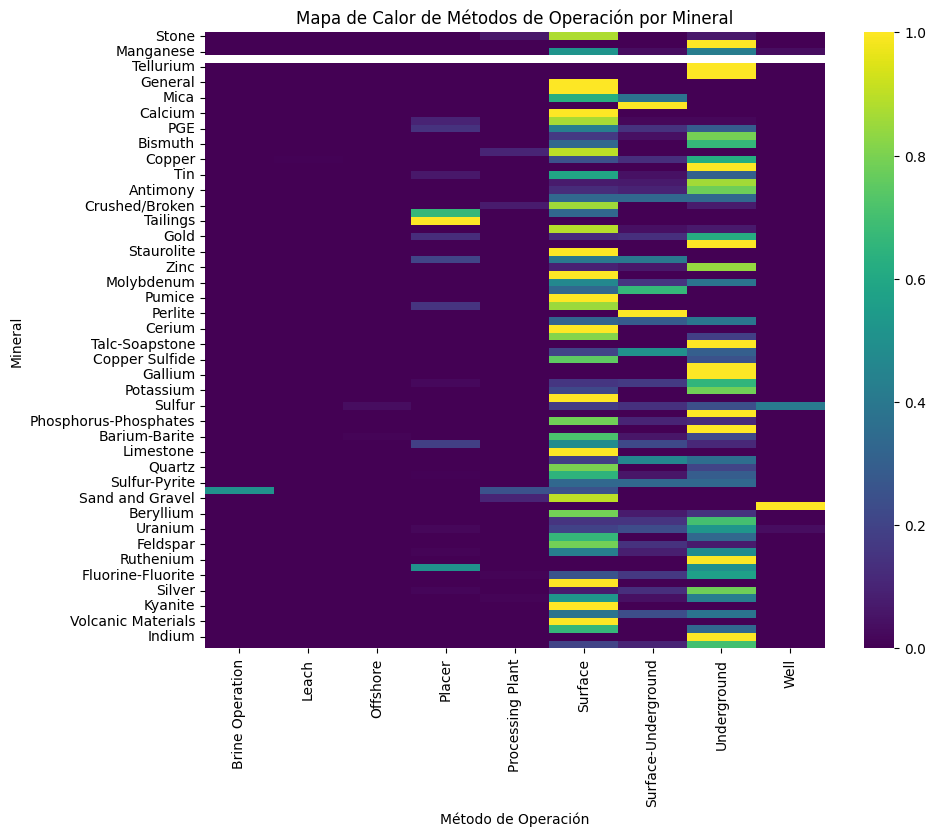

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
data_normalized = df_mineras.set_index('minerales')
data_normalized = data_normalized.div(data_normalized.sum(axis=1), axis=0)
# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(data_normalized, annot=False, cmap='viridis', cbar=True)

#  etiquetas
plt.title('Mapa de Calor de Métodos de Operación por Mineral')
plt.xlabel('Método de Operación')
plt.ylabel('Mineral')

plt.show()

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">
<h3 align="left" style="color:#6B8BA0;">Relación entre Tipo de Operación y Mineral Extraído</h3>
<p>Tras analizar la matriz de operación por mineral, se observan patrones claros que sugieren una relación entre el tipo de operación de minería y el mineral extraído. Cada mineral tiende a tener al menos un método de extracción predominante, que podría estar influenciado por factores geológicos, económicos y tecnológicos.</p>
Algunos ejemplos a destacar:
<ul>
    <li>El <strong>Hierro</strong> muestra una fuerte tendencia hacia la extracción en <strong>Superficie</strong>, lo que podría deberse a su abundancia y a la naturaleza de los depósitos que hacen viable su extracción a cielo abierto.</li>
    <li>El <strong>Uranio</strong> muestra una mezcla de extracciones en <strong>Superficie</strong> y <strong>Subterráneas</strong>, lo que puede indicar variabilidad en la profundidad y naturaleza de sus depósitos.</li>
    <li>El <strong>Oro</strong> se destaca con una notable presencia en operaciones <strong>Subterráneas</strong> y de <strong>Placer</strong>, sugiriendo que su extracción depende significativamente de la geología local y de las técnicas especializadas para procesar materiales aluviales.</li>
    <li>En el caso del <strong>Potasio</strong>, la extracción predominante es a través de <strong>Pozos</strong>, lo que es común para minerales solubles en depósitos evaporíticos.</li>
    <li>En el caso del <strong>Niobium (Columbium)</strong> no es posible obtener conclusión alguna, ya que no está identificada el tipo de operación.</li>
</ul>
</div>


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>🖇️ Pregunta 4: </font></h3>
    
* Para cada uno de los centros de explotación minera identifique cuál es y cuál es la 
distancia en km al centro de explotación minera más cercano con un tipo de operación 
diferente.

In [10]:
from geopy.distance import great_circle
import pandas as pd

# Añadir una nueva columna para la distancia al centro más cercano con diferente tipo de operación
df_mineral['nearest_diff_oper_dist'] = None
df_mineral['nearest_oper_dist_site_name'] = None

# Función para calcular la distancia y obtener el tipo de operación más cercano
def calculate_nearest_diff_oper(df, current_index):
    current_location = (df.at[current_index, 'latitude'], df.at[current_index, 'longitude'])
    current_oper_type = df.at[current_index, 'oper_type']
    
    # Inicializamos la distancia mínima con un número alto
    min_distance = float('inf')
    nearest_site_name = ''
    
    # Iteramos sobre cada centro de explotación
    for index, row in df.iterrows():
        if index == current_index or row['oper_type'] == current_oper_type:
            continue
        
        # Calculamos la distancia
        target_location = (row['latitude'], row['longitude'])
        distance = great_circle(current_location, target_location).kilometers
        target_name = row['site_name']
        
        # Actualizamos la distancia mínima y el tipo si es menor y diferente
        if distance < min_distance:
            min_distance = distance
            nearest_site_name = target_name
    
    return min_distance, nearest_site_name

In [11]:
for i, row in enumerate(df_mineral.itertuples(), 0):
    # Se guardan
    a, b = calculate_nearest_diff_oper(df_mineral, i)
    # se asignan
    df_mineral.at[i, 'nearest_diff_oper_dist'] = a
    df_mineral.at[i, 'nearest_oper_dist_site_name'] = b

In [12]:
df_mineral[['site_name','oper_type','nearest_diff_oper_dist','nearest_oper_dist_site_name']]

site_name            oper_type  \
0                       Red Dog mine  Surface-Underground   
1                             Su-Lik  Surface-Underground   
2     Many Values Pegmatite Prospect              Surface   
3              Democrat Hill deposit          Underground   
4                   Adobe Walls Mine          Underground   
...                              ...                  ...   
3120                McIlroy property          Underground   
3121               Nichols Ranch ISL                 Well   
3122     Tarrant Property in Sec. 39          Underground   
3123              Pike City Prospect              Surface   
3124                    Okolona Road              Surface   

     nearest_diff_oper_dist nearest_oper_dist_site_name  
0                253.943184                     Smucker  
1                271.996122                     Smucker  
2                  9.101063            Lake Creek Mines  
3                  1.802177          Iron Mountain Mine  
4                  9.075602                Paisano Mine  
...                     ...                         ...  
3120             101.750601               Gold Bar Mine  
3121              79.282833               Buffalo Shaft  
3122                1.01981             Margaret D Mine  
3123               6.277497                  Union Mine  
3124               1.216626              Humphreys Mine  

[3125 rows x 4 columns]